#Import gdown

In [ ]:
import gdown

# Import Dataset From GDrive

In [ ]:
file_url = "https://drive.google.com/uc?id=1r3HvcUA6CGgsoH5hQV_Zb0lxtP-yfuXF"
output_file = "Dataset_AgroAid_Lidya.zip"

gdown.download(file_url, output=output_file)

Downloading...
From: https://drive.google.com/uc?id=1r3HvcUA6CGgsoH5hQV_Zb0lxtP-yfuXF
To: /content/Dataset_AgroAid_Lidya.zip
100%|██████████| 657M/657M [00:13<00:00, 50.0MB/s]


'Dataset_AgroAid_Lidya.zip'

# Unzip File

In [ ]:
import zipfile

In [ ]:
with zipfile.ZipFile('Dataset_AgroAid_Lidya.zip', 'r') as f:
    f.extractall('./data')

# Make Train & Validation Dir

In [ ]:
train_dir_apple = "./data/Dataset_AgroAid_Lidya/train/Apple"
train_dir_corn = "./data/Dataset_AgroAid_Lidya/train/Corn"
train_dir_tomato = "./data/Dataset_AgroAid_Lidya/train/Tomato"

validation_dir_apple = "./data/Dataset_AgroAid_Lidya/valid/Apple"
validation_dir_corn = "./data/Dataset_AgroAid_Lidya/valid/Corn"
validation_dir_tomato = "./data/Dataset_AgroAid_Lidya/valid/Tomato"



```
# This is formatted as code
```

# Check Data

In [ ]:
import os

In [ ]:
print(f"There are {len(os.listdir(train_dir_apple+'/Apple___Apple_scab'))} images of Apple Scab ")
print(f"There are {len(os.listdir(train_dir_corn+'/Corn_(maize)___healthy'))} images of Corn Maize Healthy ")
print(f"There are {len(os.listdir(train_dir_tomato+'/Tomato___Spider_mites Two-spotted_spider_mite'))} Tomato Spider mites Two-spotted spider mite")

There are 2016 images of Apple Scab 
There are 1859 images of Corn Maize Healthy 
There are 1741 Tomato Spider mites Two-spotted spider mite


In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import img_to_array, load_img

Sample Apples Scab image:


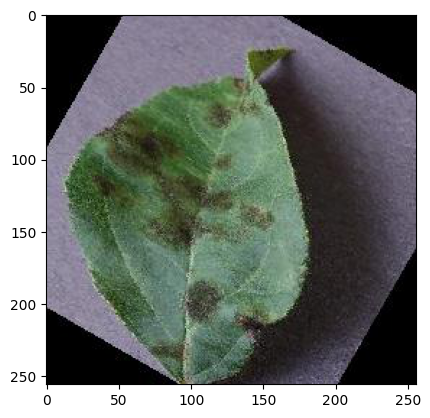

Sample Corn Maize Healthy image:


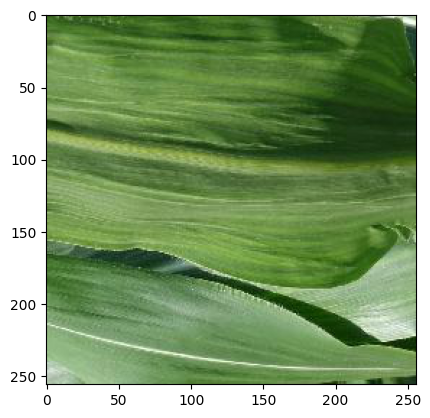

Sample Tomato Spider mites Two-spotted spider mite image:


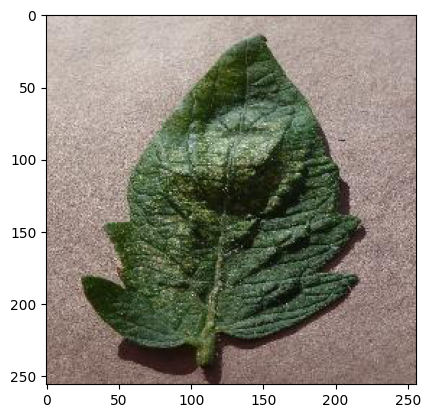

In [ ]:
print("Sample Apples Scab image:")
plt.imshow(load_img(f"{os.path.join((train_dir_apple+'/Apple___Apple_scab'), os.listdir(train_dir_apple+'/Apple___Apple_scab')[0])}"))
plt.show()

print("Sample Corn Maize Healthy image:")
plt.imshow(load_img(f"{os.path.join((train_dir_corn+'/Corn_(maize)___healthy'), os.listdir(train_dir_corn+'/Corn_(maize)___healthy')[0])}"))
plt.show()

print("Sample Tomato Spider mites Two-spotted spider mite image:")
plt.imshow(load_img(f"{os.path.join((train_dir_tomato+'/Tomato___Spider_mites Two-spotted_spider_mite'), os.listdir(train_dir_tomato+'/Tomato___Spider_mites Two-spotted_spider_mite')[0])}"))
plt.show()



```
# This is formatted as code
```

# Check Resolution Image

In [ ]:
loaded_image = img_to_array(load_img(f"{os.path.join((train_dir_apple+'/Apple___Apple_scab'), os.listdir(train_dir_apple+'/Apple___Apple_scab')[0])}"))

print(f"Each image has shape: {loaded_image.shape}")

Each image has shape: (256, 256, 3)


# Training & Validation using ImageDataGenerator

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
training_datagen = ImageDataGenerator(rescale=1./255,
                                      rotation_range=40,
                                      horizontal_flip=True,
                                      width_shift_range = 0.2,
                                      height_shift_range = 0.2,
                                      zoom_range=0.2)

training_generator_apple = training_datagen.flow_from_directory(directory=train_dir_apple,
                                                                target_size=(224,224),
                                                                class_mode='categorical',
                                                                batch_size=256)

training_generator_corn = training_datagen.flow_from_directory(directory=train_dir_corn,
                                                                target_size=(224,224),
                                                                class_mode='categorical',
                                                                batch_size=256)

training_generator_tomato = training_datagen.flow_from_directory(directory=train_dir_tomato,
                                                                target_size=(224,224),
                                                                class_mode='categorical',
                                                                batch_size=256)

validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator_apple = validation_datagen.flow_from_directory(directory=validation_dir_apple,
                                                                    target_size=(224,224),
                                                                    class_mode='categorical',
                                                                    batch_size=256)

validation_generator_corn = validation_datagen.flow_from_directory(directory=validation_dir_corn,
                                                                    target_size=(224,224),
                                                                    class_mode='categorical',
                                                                    batch_size=256)

validation_generator_tomato = validation_datagen.flow_from_directory(directory=validation_dir_tomato,
                                                                    target_size=(224,224),
                                                                    class_mode='categorical',
                                                                    batch_size=256)

label_classes_apple = list(training_generator_apple.class_indices.keys())
label_classes_corn = list(training_generator_corn.class_indices.keys())
label_classes_tomato = list(training_generator_tomato.class_indices.keys())

Found 7771 images belonging to 4 classes.
Found 7316 images belonging to 4 classes.
Found 18345 images belonging to 10 classes.
Found 1943 images belonging to 4 classes.
Found 1829 images belonging to 4 classes.
Found 4585 images belonging to 10 classes.


In [ ]:
print(label_classes_apple)
print(label_classes_corn)
print(label_classes_tomato)

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy']
['Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy']
['Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy']


# Implement Transfer Learning with ResNet50V2


In [ ]:
from tensorflow.keras.applications.resnet_v2 import ResNet50V2

In [ ]:
pre_trained_model_apple = ResNet50V2(input_shape=(224,224,3),
                               include_top=False,
                               weights='imagenet')

pre_trained_model_corn = ResNet50V2(input_shape=(224,224,3),
                               include_top=False,
                               weights='imagenet')

pre_trained_model_tomato = ResNet50V2(input_shape=(224,224,3),
                               include_top=False,
                               weights='imagenet')

pre_trained_model_apple.summary()

94668760/94668760 [==============================] - 3s 0us/step
Model: "resnet50v2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                        

# Freeze Layers


In [ ]:
for layer in pre_trained_model_apple.layers[:-30]:
    layer.trainable = False

for layer in pre_trained_model_corn.layers[:-30]:
    layer.trainable = False

for layer in pre_trained_model_tomato.layers[:-30]:
    layer.trainable = False

# Define Callback

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') >= 0.99 and logs.get('val_accuracy')>=0.99):
      print("\nReached 99% val accuracy so cancelling training!")
      self.model.stop_training = True




# Define Model

In [ ]:
model_apple = tf.keras.models.Sequential([
    pre_trained_model_apple,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(len(label_classes_apple), activation='softmax')
])

model_corn = tf.keras.models.Sequential([
    pre_trained_model_corn,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(len(label_classes_corn), activation='softmax')
])

model_tomato = tf.keras.models.Sequential([
    pre_trained_model_tomato,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(len(label_classes_tomato), activation='softmax')
])

model_apple.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_corn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_tomato.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
callbacks = myCallback()

history_apple = model_apple.fit(training_generator_apple,
                                validation_data=validation_generator_apple,
                                callbacks=callbacks,
                                epochs = 10)

Epoch 1/10
31/31 [==============================] - 151s 4s/step - loss: 0.9748 - accuracy: 0.8610 - val_loss: 7.1334 - val_accuracy: 0.8235
Epoch 2/10
31/31 [==============================] - 115s 4s/step - loss: 0.0535 - accuracy: 0.9834 - val_loss: 0.6460 - val_accuracy: 0.9696
Epoch 3/10
31/31 [==============================] - 119s 4s/step - loss: 0.0472 - accuracy: 0.9878 - val_loss: 0.3595 - val_accuracy: 0.9784
Epoch 4/10
31/31 [==============================] - 116s 4s/step - loss: 0.0309 - accuracy: 0.9906 - val_loss: 0.1325 - val_accuracy: 0.9871
Epoch 5/10
31/31 [==============================] - ETA: 0s - loss: 0.0227 - accuracy: 0.9923
Reached 99% val accuracy so cancelling training!
31/31 [==============================] - 116s 4s/step - loss: 0.0227 - accuracy: 0.9923 - val_loss: 0.0251 - val_accuracy: 0.9949


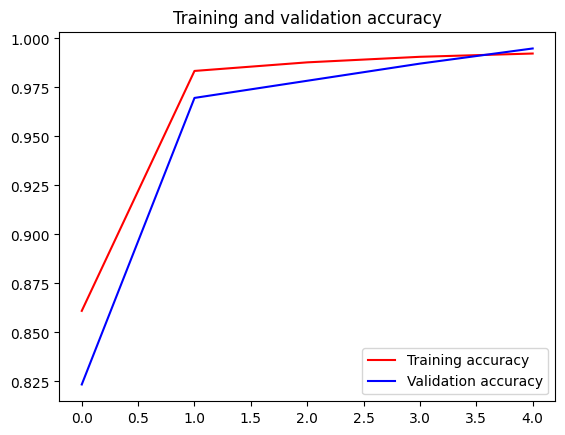

<Figure size 640x480 with 0 Axes>

In [ ]:
# Plot the results
acc = history_apple.history['accuracy']
val_acc = history_apple.history['val_accuracy']
loss = history_apple.history['loss']
val_loss = history_apple.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

In [ ]:
history_corn = model_corn.fit(training_generator_corn,
                                validation_data=validation_generator_corn,
                                callbacks=callbacks,
                                epochs = 35)

Epoch 1/35
29/29 [==============================] - 130s 4s/step - loss: 1.1217 - accuracy: 0.8126 - val_loss: 9.2883 - val_accuracy: 0.7775
Epoch 2/35
29/29 [==============================] - 110s 4s/step - loss: 0.1125 - accuracy: 0.9600 - val_loss: 3.7788 - val_accuracy: 0.9492
Epoch 3/35
29/29 [==============================] - 109s 4s/step - loss: 0.0925 - accuracy: 0.9690 - val_loss: 0.7052 - val_accuracy: 0.9656
Epoch 4/35
29/29 [==============================] - 109s 4s/step - loss: 0.1061 - accuracy: 0.9731 - val_loss: 1.1517 - val_accuracy: 0.9656
Epoch 5/35
29/29 [==============================] - 108s 4s/step - loss: 0.0904 - accuracy: 0.9712 - val_loss: 27.4943 - val_accuracy: 0.8524
Epoch 6/35
29/29 [==============================] - 110s 4s/step - loss: 0.0770 - accuracy: 0.9768 - val_loss: 3.5511 - val_accuracy: 0.9481
Epoch 7/35
29/29 [==============================] - 107s 4s/step - loss: 0.0593 - accuracy: 0.9813 - val_loss: 2.8800 - val_accuracy: 0.9590
Epoch 8/35
2

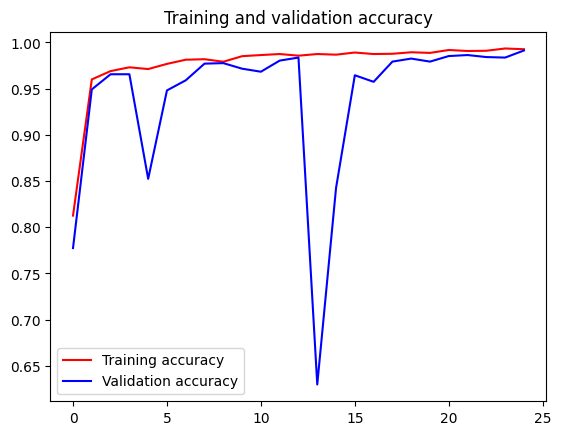

<Figure size 640x480 with 0 Axes>

In [ ]:
# Plot the results
acc = history_corn.history['accuracy']
val_acc = history_corn.history['val_accuracy']
loss = history_corn.history['loss']
val_loss = history_corn.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

In [ ]:
history_tomato = model_tomato.fit(training_generator_tomato,
                                validation_data=validation_generator_tomato,
                                callbacks=callbacks,
                                epochs = 45)

Epoch 1/45
72/72 [==============================] - 294s 4s/step - loss: 1.1817 - accuracy: 0.6868 - val_loss: 2.6891 - val_accuracy: 0.6997
Epoch 2/45
72/72 [==============================] - 270s 4s/step - loss: 0.3288 - accuracy: 0.9005 - val_loss: 0.9707 - val_accuracy: 0.8236
Epoch 3/45
72/72 [==============================] - 272s 4s/step - loss: 0.2447 - accuracy: 0.9254 - val_loss: 0.4734 - val_accuracy: 0.8918
Epoch 4/45
72/72 [==============================] - 269s 4s/step - loss: 0.1805 - accuracy: 0.9449 - val_loss: 0.2436 - val_accuracy: 0.9354
Epoch 5/45
72/72 [==============================] - 271s 4s/step - loss: 0.1600 - accuracy: 0.9524 - val_loss: 0.1285 - val_accuracy: 0.9614
Epoch 6/45
72/72 [==============================] - 272s 4s/step - loss: 0.1389 - accuracy: 0.9592 - val_loss: 0.1245 - val_accuracy: 0.9627
Epoch 7/45
72/72 [==============================] - 269s 4s/step - loss: 0.1142 - accuracy: 0.9645 - val_loss: 0.3558 - val_accuracy: 0.9152
Epoch 8/45
72

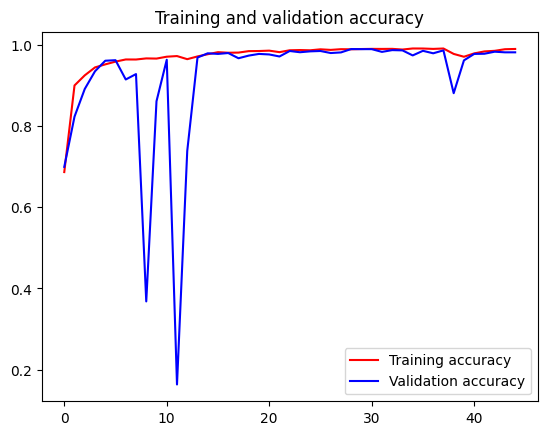

<Figure size 640x480 with 0 Axes>

In [ ]:
# Plot the results
acc = history_tomato.history['accuracy']
val_acc = history_tomato.history['val_accuracy']
loss = history_tomato.history['loss']
val_loss = history_tomato.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

# Mount Drive

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).




# Save Model

In [ ]:
model_apple.save("/content/drive/MyDrive/models/model_apple.h5")

In [ ]:
model_corn.save("/content/drive/MyDrive/models/model_corn.h5")

In [ ]:
model_tomato.save("/content/drive/MyDrive/models/model_tomato.h5")

# Model inference

In [ ]:
import os
import tensorflow as tf

loaded_apple = tf.keras.models.load_model('/content/drive/MyDrive/models/model_apple.h5')
loaded_corn = tf.keras.models.load_model('/content/drive/MyDrive/models/model_corn.h5')
loaded_tomato = tf.keras.models.load_model('/content/drive/MyDrive/models/model_tomato.h5')

In [ ]:
label_apple = ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy']
label_corn = ['Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy']
label_tomato = ['Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy']

Import Data For Testing From GDrive

In [ ]:
file_url = "https://drive.google.com/uc?id=193q74EhSywtYWPQSv5Lq03zAEV6ecFGK"
output_file = "/tmp/test.zip"

gdown.download(file_url, output=output_file)

Downloading...
From: https://drive.google.com/uc?id=193q74EhSywtYWPQSv5Lq03zAEV6ecFGK
To: /tmp/test.zip
100%|██████████| 373k/373k [00:00<00:00, 120MB/s]


'/tmp/test.zip'

In [ ]:
with zipfile.ZipFile('/tmp/test.zip', 'r') as f:
    f.extractall('/tmp')

In [ ]:
BASE_DIR = '/tmp/test'
train_dir_apple = BASE_DIR + '/apple'
train_dir_corn = BASE_DIR + '/corn'
train_dir_tomato = BASE_DIR + '/tomato'

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import img_to_array, load_img

def test_model(plant):

  label_apple = ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy']
  label_corn = ['Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy']
  label_tomato = ['Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy']

  labels_dict = {'apple':label_apple, 'corn':label_corn, 'tomato':label_tomato}
  model_dict = {'apple':model_apple, 'corn':model_corn, 'tomato':model_tomato}
  dir_dict = {'apple':train_dir_apple, 'corn':train_dir_corn, 'tomato':train_dir_tomato}

  labels = labels_dict.get(plant)
  model = model_dict.get(plant)
  dir = dir_dict.get(plant)
  images = os.listdir(dir)

  print("Loaded Images:")
  print(images)
  print('\n')

  # predicting images
  for i in images:
      path = dir + '/' + i
      loaded_image = load_img(path, target_size=(224, 224))
      transformed_image = img_to_array(loaded_image)
      transformed_image = transformed_image / 255.0
      transformed_image = np.expand_dims(transformed_image, axis=0)
      transformed_image = np.vstack([transformed_image])

      prediction_array = model.predict(transformed_image, batch_size=10)
      prediction = labels[np.argmax(prediction_array)]

      print('Image name: %s' % (i))
      print(prediction_array)
      print('This %s is %s' % (plant, prediction))
      print('\n')


In [ ]:
test_model('apple')

Loaded Images:
['AppleScab3.JPG', 'AppleCedarRust4.JPG', 'AppleCedarRust3.JPG', 'AppleScab1.JPG', 'AppleCedarRust2.JPG', 'AppleScab2.JPG', 'AppleCedarRust1.JPG']


1/1 [==============================] - 2s 2s/step
Image name: AppleScab3.JPG
[[1. 0. 0. 0.]]
This apple is Apple___Apple_scab


1/1 [==============================] - 0s 24ms/step
Image name: AppleCedarRust4.JPG
[[0. 0. 1. 0.]]
This apple is Apple___Cedar_apple_rust


1/1 [==============================] - 0s 27ms/step
Image name: AppleCedarRust3.JPG
[[1.5925935e-35 0.0000000e+00 1.0000000e+00 0.0000000e+00]]
This apple is Apple___Cedar_apple_rust


1/1 [==============================] - 0s 26ms/step
Image name: AppleScab1.JPG
[[1.0000000e+00 5.2200890e-17 4.0847503e-08 7.4330960e-13]]
This apple is Apple___Apple_scab


1/1 [==============================] - 0s 26ms/step
Image name: AppleCedarRust2.JPG
[[0. 0. 1. 0.]]
This apple is Apple___Cedar_apple_rust


1/1 [==============================] - 0s 27ms/step
Image name: App

In [ ]:
test_model('corn')

Loaded Images:
['CornCommonRust3.JPG', 'CornCommonRust1.JPG', 'CornCommonRust2.JPG']


1/1 [==============================] - 1s 832ms/step
Image name: CornCommonRust3.JPG
[[9.2134323e-20 1.0000000e+00 6.8375825e-18 3.6142786e-24]]
This corn is Corn_(maize)___Common_rust_


1/1 [==============================] - 0s 26ms/step
Image name: CornCommonRust1.JPG
[[1.5354922e-17 1.0000000e+00 5.6003222e-15 1.1827832e-21]]
This corn is Corn_(maize)___Common_rust_


1/1 [==============================] - 0s 25ms/step
Image name: CornCommonRust2.JPG
[[8.6797009e-24 1.0000000e+00 6.3421014e-22 4.9801554e-30]]
This corn is Corn_(maize)___Common_rust_




In [ ]:
test_model('tomato')

Loaded Images:
['TomatoHealthy4.JPG', 'TomatoEarlyBlight4.JPG', 'TomatoEarlyBlight5.JPG', 'TomatoYellowCurlVirus2.JPG', 'TomatoEarlyBlight2.JPG', 'TomatoEarlyBlight1.JPG', 'TomatoEarlyBlight6.JPG', 'TomatoYellowCurlVirus3.JPG', 'TomatoEarlyBlight3.JPG', 'TomatoYellowCurlVirus6.JPG', 'TomatoYellowCurlVirus4.JPG', 'TomatoHealthy1.JPG', 'TomatoHealthy3.JPG', 'TomatoYellowCurlVirus1.JPG', 'TomatoHealthy2.JPG', 'TomatoYellowCurlVirus5.JPG']


1/1 [==============================] - 1s 836ms/step
Image name: TomatoHealthy4.JPG
[[4.77136538e-17 1.74702557e-15 1.05664644e-10 9.11548072e-19
  2.23160164e-14 3.07940759e-14 1.74438297e-10 4.93507896e-19
  9.88810513e-22 1.00000000e+00]]
This tomato is Tomato___healthy


1/1 [==============================] - 0s 25ms/step
Image name: TomatoEarlyBlight4.JPG
[[3.7748948e-01 5.4292583e-01 1.0829375e-02 2.4467874e-02 2.5924377e-02
  2.9224101e-03 1.0871074e-02 2.6484933e-03 3.1409026e-04 1.6069377e-03]]
This tomato is Tomato___Early_blight


1/1 [=====

In [ ]:
from tensorflow.keras.utils import plot_model

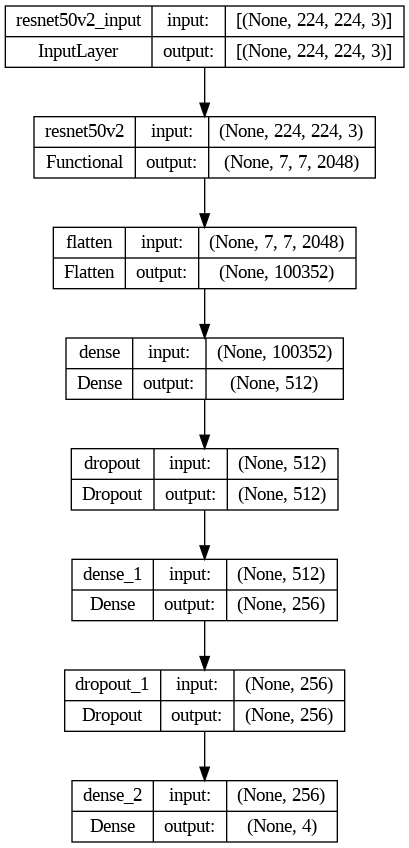

In [ ]:
plot_model(loaded_apple, show_shapes=True, show_layer_names=True, to_file='apple-model.png')

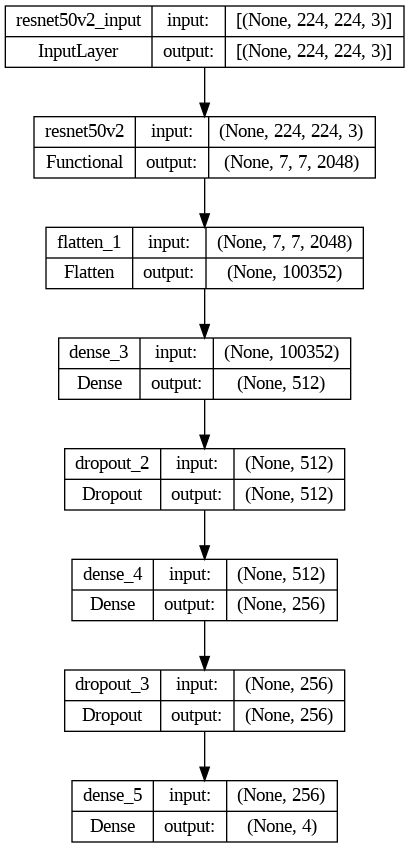

In [ ]:
plot_model(loaded_corn, show_shapes=True, show_layer_names=True, to_file='corn-model.png')

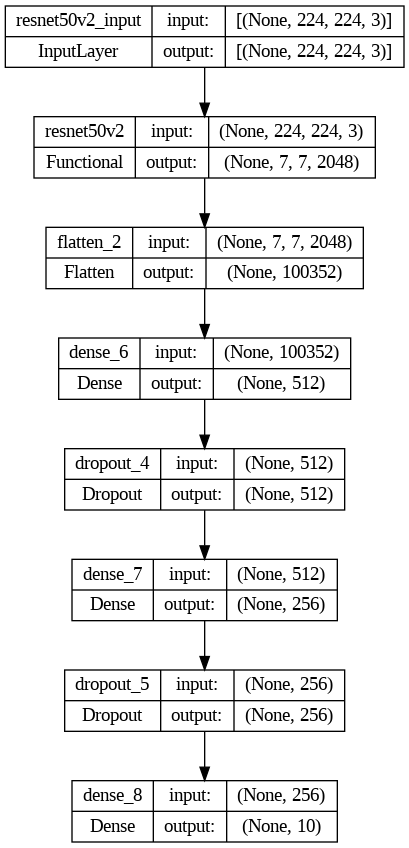

In [ ]:
plot_model(loaded_tomato, show_shapes=True, show_layer_names=True, to_file='tomato-model.png')